#### Forecasting Timeseries Data Using Facebook FbProphet
Steps Required With FbProphet

* Introduction And Installation
* Data Preprocessing With Time Seires
* Model Fitting
* Obtaining The Forecasts
* Plotting The Forecasts
* Cross Validation
* Computing Performance Metrics
* Visualize the Performance MEtrics
* Conclusions

In [11]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:

df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
df.drop(168,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [9]:
df.columns=['ds','y']

<AxesSubplot:>

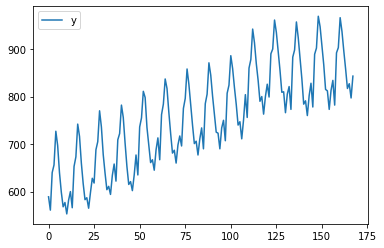

In [10]:
df.plot()

In [12]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [13]:
df['ds']=pd.to_datetime(df['ds'])

In [14]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [15]:
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

* Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
* You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. 
* By default it will also include the dates from the history, so we will see the model fit as well.

In [24]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


* The predict method will assign each row in future a predicted value which it names yhat. 
* If you pass in historical dates, it will provide an in-sample fit. 
* The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [26]:
forecast = model.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
528,1976-11-26,875.067691,804.794832,826.340920,870.748514,879.620478,-59.828629,-59.828629,-59.828629,-59.828629,-59.828629,-59.828629,0.0,0.0,0.0,815.239063
529,1976-11-27,875.086036,807.386287,829.337341,870.750503,879.661746,-56.668299,-56.668299,-56.668299,-56.668299,-56.668299,-56.668299,0.0,0.0,0.0,818.417737
530,1976-11-28,875.104380,811.473128,832.460721,870.747559,879.694667,-53.333610,-53.333610,-53.333610,-53.333610,-53.333610,-53.333610,0.0,0.0,0.0,821.770770
531,1976-11-29,875.122725,814.758291,836.983106,870.744615,879.715410,-49.887245,-49.887245,-49.887245,-49.887245,-49.887245,-49.887245,0.0,0.0,0.0,825.235479
532,1976-11-30,875.141069,817.732849,840.281305,870.741672,879.740089,-46.398941,-46.398941,-46.398941,-46.398941,-46.398941,-46.398941,0.0,0.0,0.0,828.742128


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

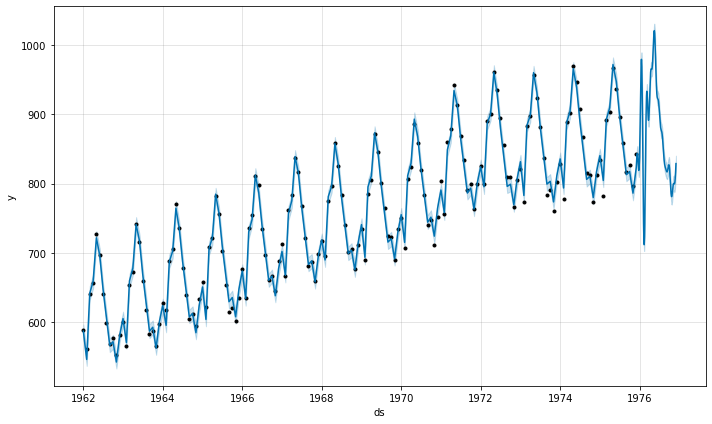

In [27]:
fig1 = model.plot(forecast)


* If you want to see the forecast components, you can use the Prophet.plot_components method.  
+ By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
+ If you include holidays, you’ll see those here, too.

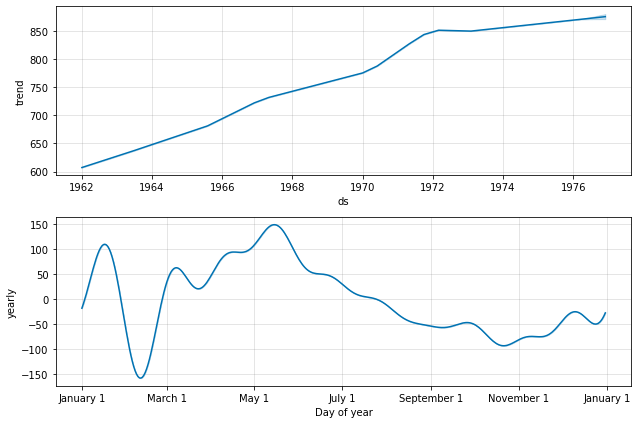

In [28]:
fig2 = model.plot_components(forecast)

### Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

+ horizon the forecast horizon
+ initial the size of the initial training period
+ period the spacing between cutoff dates

In [30]:
from prophet.diagnostics import cross_validation

In [33]:
df_cv = cross_validation(model, initial='1065 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [34]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,633.103379,630.531111,634.933647,622.0,1965-01-22
1,1965-03-01,719.988685,711.754772,727.134291,709.0,1965-01-22
2,1965-04-01,744.891354,728.906458,759.553194,722.0,1965-01-22
3,1965-05-01,817.040441,790.911598,840.611719,782.0,1965-01-22
4,1965-06-01,785.567344,748.597107,819.861454,756.0,1965-01-22
